In [21]:
import numpy as np
import pandas as pd
import gzip
import argparse
import scipy.stats
import matplotlib.pyplot as plt

import seaborn as sns

In [22]:
!pwd

/carnegie/nobackup/scratch/tbellagio/gea_grene-net/kendall_tau


In [23]:
biovar = 'bio18'

In [24]:
#finalgen_samples = pd.read_csv('../final_gen.csv')['sample_name']
first_gen_samples = pd.read_csv('../key_files/generation_1_sample_names.txt',header=None)[0]

samples = first_gen_samples.to_list()

#clim_sites_during_exp = pd.read_csv('/carnegie/nobackup/scratch/tbellagio/grene/data/bioclimvars_experimental_sites_era5.csv')
clim_sites_during_exp = pd.read_csv('../key_files/bioclimvars_sites_era5_year_2018.csv')

sites_af = pd.Series(samples).str.split('_').str[0].astype(int)

sites_af.name = 'site'

env = sites_af.reset_index().merge(clim_sites_during_exp).drop(['index'],axis=1)

In [25]:
bio = env[biovar]

In [26]:
af = pd.read_csv('../key_files/allele_freq_maf05_mincount05_firstgensamples.csv')

In [1]:
af

NameError: name 'af' is not defined

In [27]:
p_bar = af.mean(axis=1)

# Apply the MAF calculation using a lambda function
maf = p_bar.apply(lambda x: 1 - x if x > 0.5 else x)

In [28]:
#maf.to_csv('../key_files/maf_all_sample_first_gen.csv',index=None)

In [29]:
deltap = pd.read_csv('../key_files/delta_p_maf05_mincount05_firstgensamples.csv')

In [30]:
deltap.head()

,1_1_1,1_1_2,1_1_3,1_1_4,1_1_5,1_1_6,1_1_7,1_1_8,1_1_9,1_1_10,...,60_1_3,60_1_4,60_1_5,60_1_6,60_1_7,60_1_8,60_1_9,60_1_10,60_1_11,60_1_12
0,0.039851,-0.022249,0.005975,-0.002768,0.086611,0.034185,0.017465,0.007105,-0.002809,-0.018828,...,0.003421,-0.047405,0.159179,0.139286,0.182493,-0.031104,0.394335,-0.024800,0.214351,0.331971
1,-0.020668,0.000698,-0.007956,0.001986,0.031012,0.004009,0.021019,0.002039,-0.009811,0.018277,...,-0.025259,0.105829,-0.040566,-0.064403,-0.050163,0.067992,-0.051357,-0.058157,0.018033,-0.054994
2,0.065410,0.029291,0.028094,0.000849,-0.019301,-0.012998,0.038581,0.008223,0.025646,-0.011675,...,-0.048935,-0.080047,-0.081113,0.045648,-0.070372,0.139095,-0.076162,-0.066051,0.008938,-0.070543
3,-0.003255,-0.030301,0.005827,0.003770,0.011553,0.010329,-0.012324,0.074486,0.029942,-0.019629,...,0.045172,-0.002671,0.075177,-0.048536,-0.047425,0.084227,-0.000432,0.141513,0.131201,0.058140
4,-0.003255,-0.030301,0.005827,0.003770,0.011553,0.010329,-0.012324,0.074486,0.029942,-0.019629,...,0.045172,-0.002671,0.075177,-0.048536,-0.047425,0.084227,-0.000432,0.141513,0.131201,0.058140


In [31]:
kendall = {}

# Iterate through each row in af
for index, row in af.iterrows():
    # Apply kendalltau to the current row and bio1
    geno_k_tau, geno_k_tau_p_value = scipy.stats.kendalltau(bio, row)
    kendall[index] = [geno_k_tau,geno_k_tau_p_value]

In [32]:
kendall = pd.DataFrame(kendall).T

In [33]:
kendall['MAF'] = maf

In [34]:
kendall.columns = ["K_tau","K_tau_p", "MAF"]

In [35]:
kendall

,K_tau,K_tau_p,MAF
0,-0.009168,8.078257e-01,0.281796
1,-0.088595,1.875348e-02,0.074906
2,-0.009974,7.913147e-01,0.104640
3,-0.261328,4.216954e-12,0.065442
4,-0.261328,4.216954e-12,0.065442
...,...,...,...
1054569,0.223621,2.988543e-09,0.161471
1054570,-0.072967,5.290657e-02,0.072238
1054571,-0.072967,5.290657e-02,0.072238
1054572,-0.022709,5.468530e-01,0.474359


In [36]:
kendall

,K_tau,K_tau_p,MAF
0,-0.009168,8.078257e-01,0.281796
1,-0.088595,1.875348e-02,0.074906
2,-0.009974,7.913147e-01,0.104640
3,-0.261328,4.216954e-12,0.065442
4,-0.261328,4.216954e-12,0.065442
...,...,...,...
1054569,0.223621,2.988543e-09,0.161471
1054570,-0.072967,5.290657e-02,0.072238
1054571,-0.072967,5.290657e-02,0.072238
1054572,-0.022709,5.468530e-01,0.474359


In [37]:
snps_names = pd.read_csv('../key_files/var_pos_grenenet.csv')


In [38]:
snps_names = pd.read_csv('../key_files/var_pos_grenenet.csv')

import pickle
with open('../key_files/blocks_snpsid_dict.pkl', 'rb') as f:
    dict_blocks = pickle.load(f)

reverse_mapping = {item: key for key, values in dict_blocks.items() for item in values}

snps_names = snps_names[snps_names['total_alleles05filter_firstgen'].notna()].reset_index(drop=True)



In [39]:
kendall = pd.concat([snps_names[['id', 'pos', 'chrom']], kendall],axis=1)

kendall['block'] = kendall['id'].map(reverse_mapping) 

In [40]:
#kendall.to_csv(f'kendall_corr_{biovar}.csv',index=None)

In [53]:
kendall = pd.read_csv(f'kendall_corr_{biovar}.csv')

In [54]:
kendall

,id,pos,chrom,K_tau,K_tau_p,MAF,block
0,1_346,346,1,-0.009168,8.078257e-01,0.281796,1_0
1,1_353,353,1,-0.088595,1.875348e-02,0.074906,1_0
2,1_363,363,1,-0.009974,7.913147e-01,0.104640,1_0
3,1_395,395,1,-0.261328,4.216954e-12,0.065442,1_0
4,1_396,396,1,-0.261328,4.216954e-12,0.065442,1_0
...,...,...,...,...,...,...,...
1054569,5_26975078,26975078,5,0.223621,2.988543e-09,0.161471,5_3110
1054570,5_26975121,26975121,5,-0.072967,5.290657e-02,0.072238,5_3110
1054571,5_26975148,26975148,5,-0.072967,5.290657e-02,0.072238,5_3110
1054572,5_26975272,26975272,5,-0.022709,5.468530e-01,0.474359,5_3110


In [57]:
kendall = kendall.sort_values('K_tau_p').head(100)

In [58]:
import pickle
dict_blocks = '../key_files/blocks_snpsid_dict.pkl'

with open(dict_blocks, 'rb') as file:
    dict_blocks = pickle.load(file)

reverse_mapping = {item: key for key, values in dict_blocks.items() for item in values}

In [59]:
kendall['block'] = kendall['id'].map(reverse_mapping)

In [60]:
kendall = kendall.drop_duplicates('block')

In [61]:
biovar = 'bio18'

In [62]:
kendall

,id,pos,chrom,K_tau,K_tau_p,MAF,block
383268,2_12016468,12016468,2,-0.383544,2.549709e-24,0.045798,2_1287
384799,2_12197734,12197734,2,-0.377977,1.171715e-23,0.042170,2_1295


In [63]:
kendall.to_csv(f'top_hits_binom_first_gen_{biovar}.csv')

In [64]:
kendall

,id,pos,chrom,K_tau,K_tau_p,MAF,block
383268,2_12016468,12016468,2,-0.383544,2.549709e-24,0.045798,2_1287
384799,2_12197734,12197734,2,-0.377977,1.171715e-23,0.042170,2_1295


<Axes: xlabel='K_tau_p', ylabel='Count'>

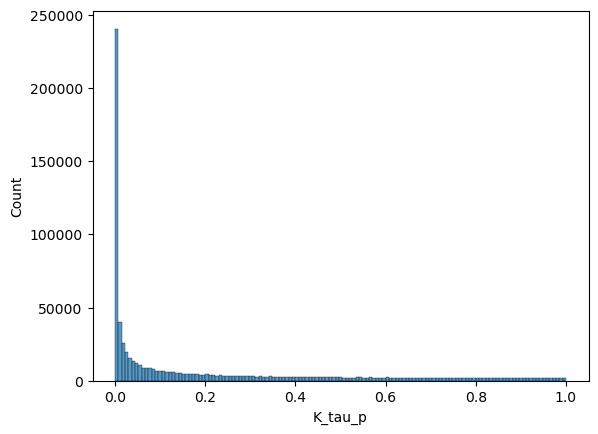

In [53]:
sns.histplot(kendall['K_tau_p'])

In [ ]:
biovar='bio1'

NameError: name 'biovar' is not defined

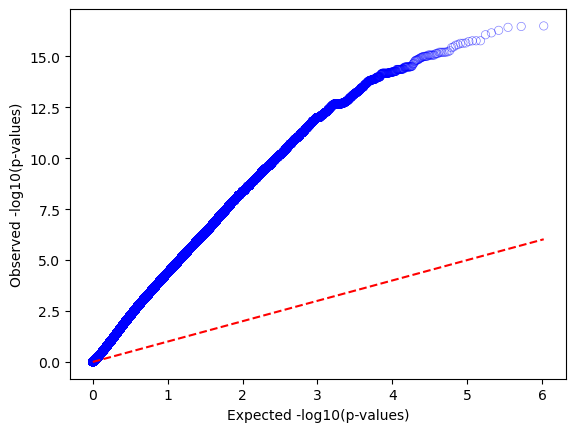

In [25]:
# Sort the p-values in ascending order
observed_quantiles = -np.log10(np.sort(kendall['K_tau_p'].values))

# Expected quantiles from the uniform distribution
expected_quantiles = -np.log10(np.linspace(1 / len(kendall), 1, len(kendall)))

# QQ plot
sns.scatterplot(x = expected_quantiles, y = observed_quantiles, edgecolor='b', facecolor='none', alpha=0.5)
plt.plot([min(expected_quantiles), max(expected_quantiles)], [min(expected_quantiles), max(expected_quantiles)], 'r--')

plt.xlabel("Expected -log10(p-values)")
plt.ylabel("Observed -log10(p-values)")
plt.title(f'QQ Plot for {biovar} Kendall tau corr')

plt.show()

/tmp/ipykernel_1206244/36481905.py:31: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


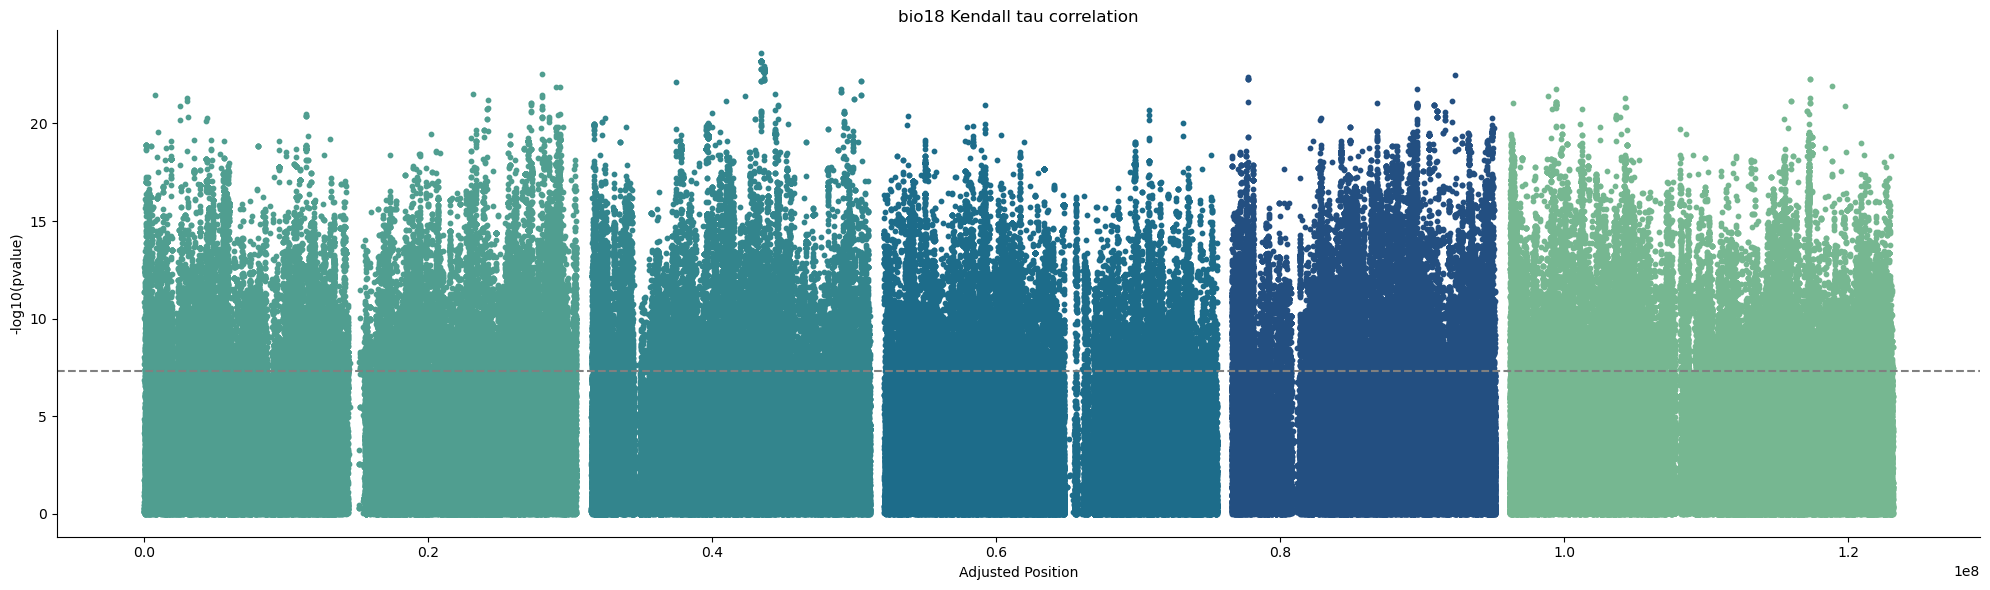

In [55]:
threshold_value = 0.05 / len(kendall)

#sm.qqplot(pvalues['pvalue'], line ='45') 
#py.show() 

df = kendall[['K_tau_p', 'pos', 'chrom']].copy()

colors = sns.color_palette("crest", n_colors = 5)

# Parsing chromosome number and position
df['chromosome'] = df['chrom']
df['position'] = df['pos']
df['-log10(pvalue)'] = -np.log10(df['K_tau_p'])

# Calculate the offset for each chromosome to prevent overlap
chromosome_offsets = {}
offset = 0
for chrom in sorted(df['chromosome'].unique()):
    chromosome_offsets[chrom] = offset
    max_position = df[df['chromosome'] == chrom]['position'].max()
    offset += max_position + 1000000  # Adding 1 million as a buffer between chromosomes

# Apply offsets to positions
df['adjusted_position'] = df.apply(lambda row: row['position'] + chromosome_offsets[row['chromosome']], axis=1)

# Creating the Manhattan plot
plt.figure(figsize=(20, 6))

for chrom in sorted(df['chromosome'].unique()):
    subset = df[df['chromosome'] == chrom]
    plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)

# Aesthetics
plt.xlabel('Adjusted Position')
plt.ylabel('-log10(pvalue)')
#plt.title('Manhattan Plot')
#plt.grid(axis='y')
#plt.legend(title="Chromosome", bbox_to_anchor=(1.05, 1), loc='upper left')
ax = plt.gca()  # Get current axes
ax.spines['top'].set_visible(False)  # Remove the top spine
ax.spines['right'].set_visible(False)
# Threshold line (optional)
threshold = -np.log10(threshold_value)
plt.axhline(y=threshold, color='grey', linestyle='dashed')
plt.title(f'{biovar} Kendall tau correlation')  # Set the title

# Show the plot
plt.tight_layout()
plt.savefig(f'manhattan_kendall_{biovar}.png')
plt.show()